### 01 Plate Area Extraction
Task：
 - Extract the plate area from the source image

In [1]:
import cv2
from matplotlib import pyplot as plt

# Display pictures
def cv_show(name,img):
    cv2.imshow(name,img)
    cv2.waitKey()
    cv2.destroyAllWindows()

def plt_show0(img):
    b,g,r = cv2.split(img)
    img = cv2.merge([r, g, b])
    plt.imshow(img)
    plt.show()
    
# Display gray scale pictures
def plt_show(img):
    plt.imshow(img,cmap='gray')
    plt.show()  

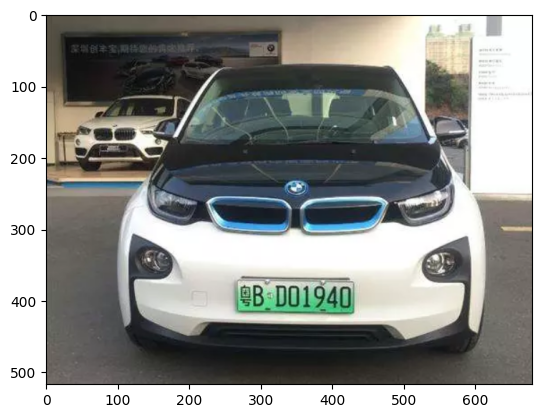

In [2]:
#Load pictures
rawImage = cv2.imread("./image/test2.png")
plt_show0(rawImage)

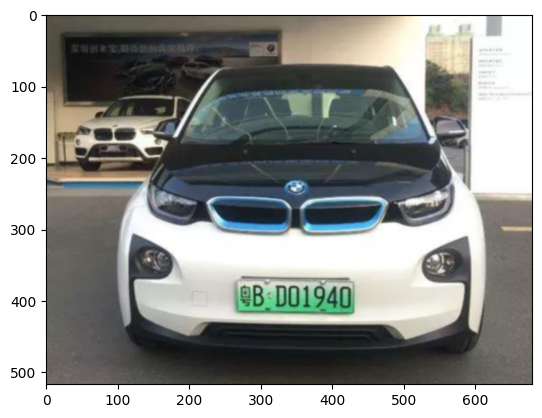

In [3]:
# Gaussian blur
image = cv2.GaussianBlur(rawImage, (3, 3), 0)
plt_show0(image)

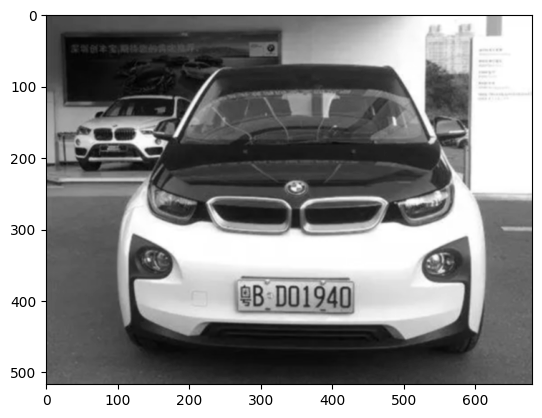

In [4]:
# RGBGray
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt_show(gray_image)

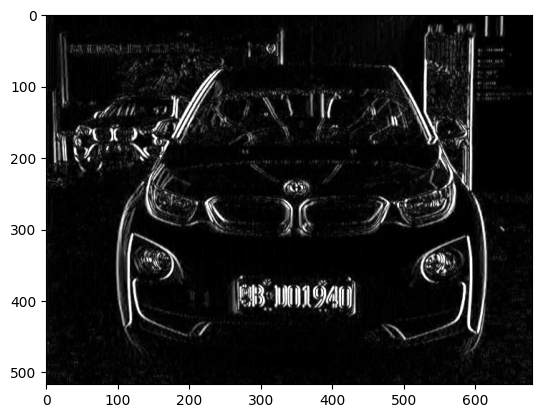

In [5]:
# sobel
Sobel_x = cv2.Sobel(gray_image, cv2.CV_16S, 1, 0)
# Sobel_y = cv2.Sobel(image, cv2.CV_16S, 0, 1)
absX = cv2.convertScaleAbs(Sobel_x)  # uint8
# absY = cv2.convertScaleAbs(Sobel_y)
# dst = cv2.addWeighted(absX, 0.5, absY, 0.5, 0)
image = absX
plt_show(image)

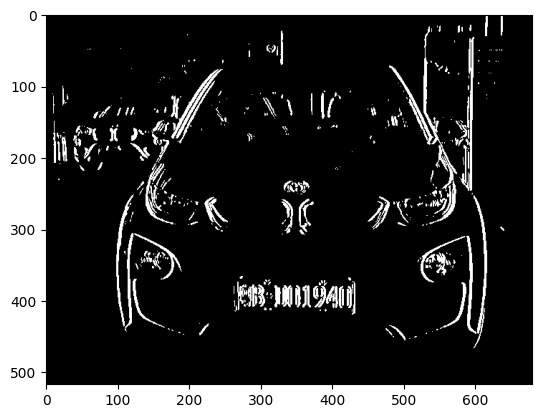

In [6]:
# threshold
ret, image = cv2.threshold(image, 0, 255, cv2.THRESH_OTSU)
plt_show(image)

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]


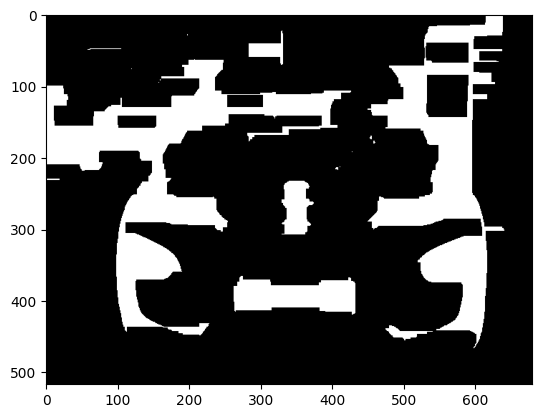

In [7]:
kernelX = cv2.getStructuringElement(cv2.MORPH_RECT, (17, 5))
print(kernelX)
image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernelX,iterations = 3)
plt_show(image)

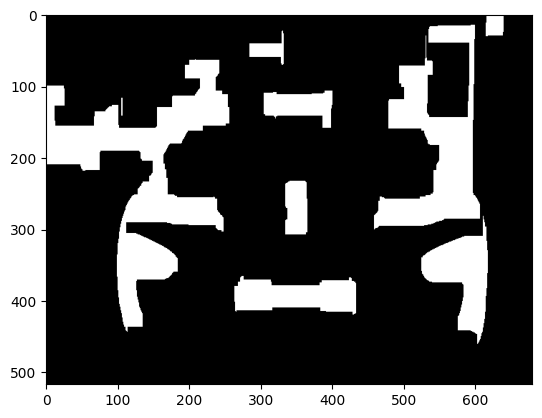

In [8]:
# Remove some white spots
kernelX = cv2.getStructuringElement(cv2.MORPH_RECT, (20, 1))
kernelY = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 19))

# Dilate,erode
image = cv2.dilate(image, kernelX)
image = cv2.erode(image, kernelX)
# erode, dilate
image = cv2.erode(image, kernelY)
image = cv2.dilate(image, kernelY)

plt_show(image)

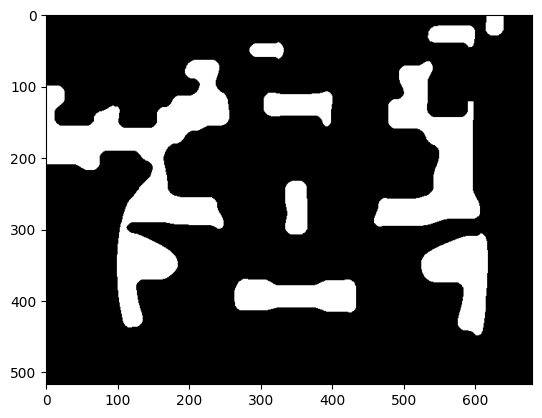

In [9]:
# mblur to filter some noise
image = cv2.medianBlur(image, 15)
plt_show(image)

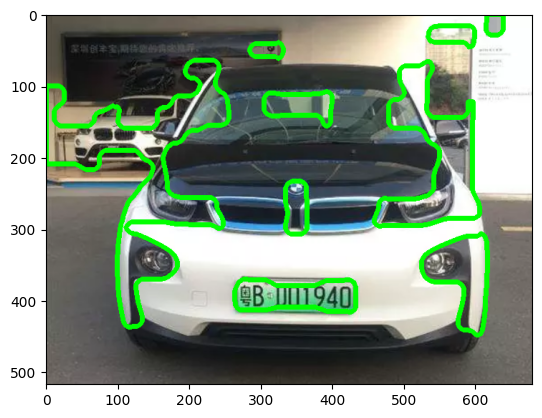

In [10]:
# Detect contours
# cv2.RETR_EXTERNAL represents the outer contours
# cv2.CHAIN_APPROX_SIMPLE--only get four spots of the cornor from the plate
contours, hierarchy = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# Plots contours
image1 = rawImage.copy()
cv2.drawContours(image1, contours, -1, (0, 255, 0), 5)
plt_show0(image1)

In [11]:
# numbers of contours
len(contours)

9

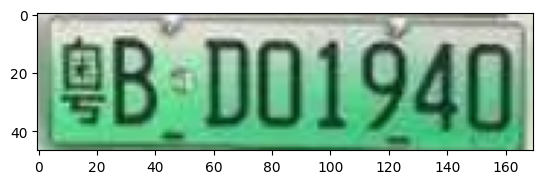

Plate Extraction succeed！


In [12]:
# Filter contours
# Get the one width/height between 3.0 to 4.0
for item in contours:
    # Make contours into rectangulars
    rect = cv2.boundingRect(item)
    x = rect[0]
    y = rect[1]
    weight = rect[2]
    height = rect[3]
    # 440mm×140mm
    if (weight > (height * 2.5)) and (weight < (height * 4)):
        image = rawImage[y:y + height, x:x + weight]
#         cv_show('image',image)
        # Save image
        plt_show0(image)
        cv2.imwrite('./car_license/test4.png', image)
print("Plate Extraction succeed！")